In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Saving The Model
import joblib
import pickle


import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV


In [3]:
data = pd.read_csv("./insurance fraud claims.csv")

data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### CHECK FOR MISSING VALUES

In [6]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
data.drop("_c39", axis=1, inplace=True)

In [8]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


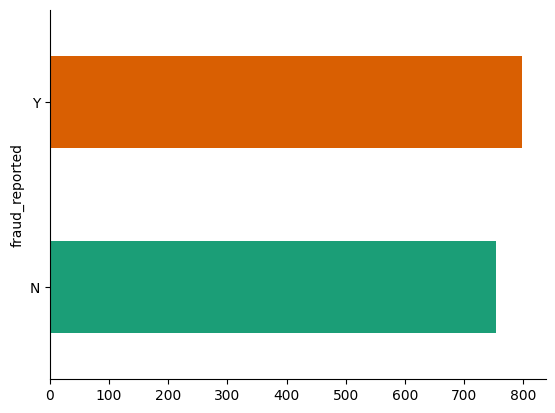

In [9]:
for column in data.columns:
  data.groupby(column).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


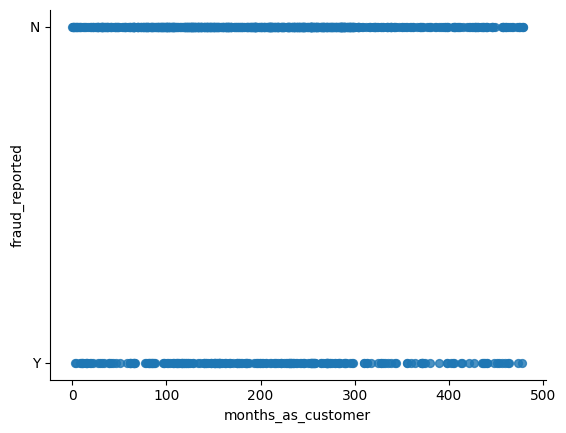

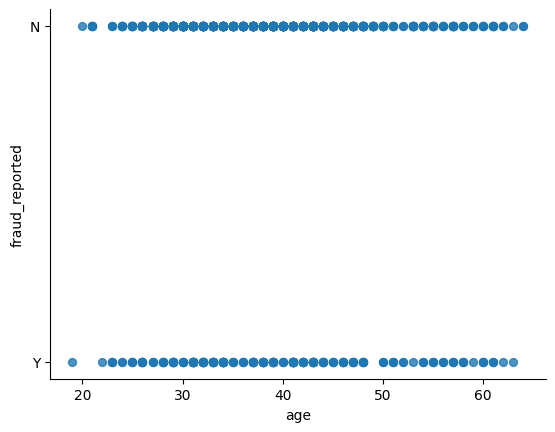

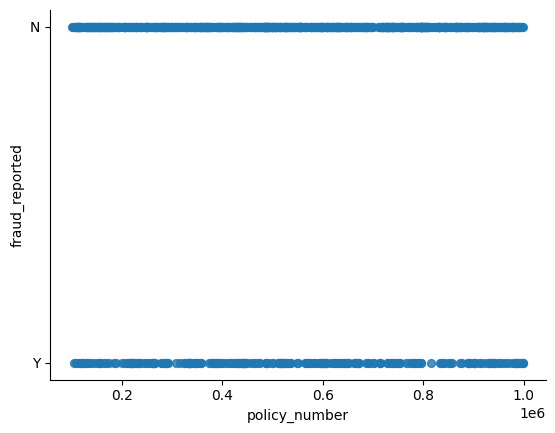

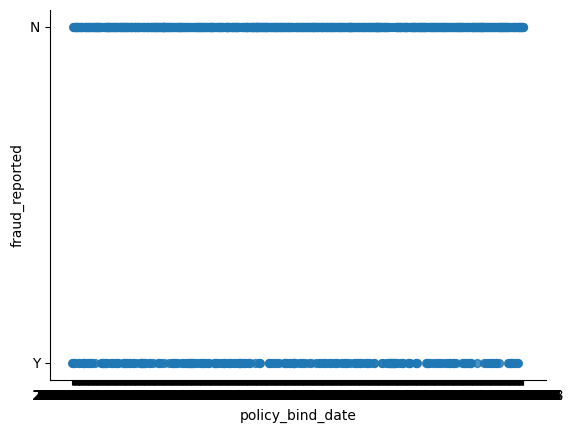

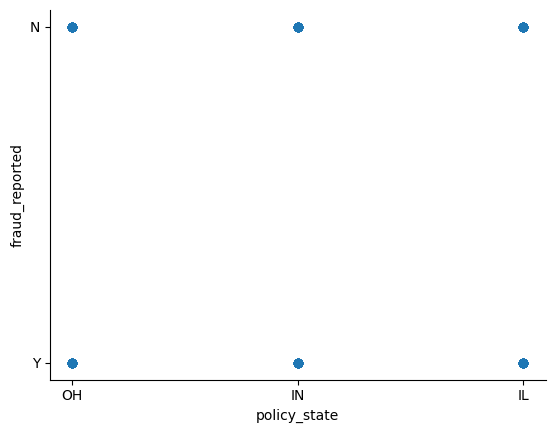

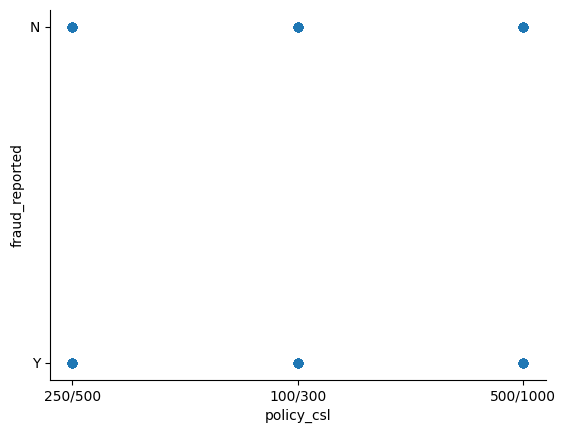

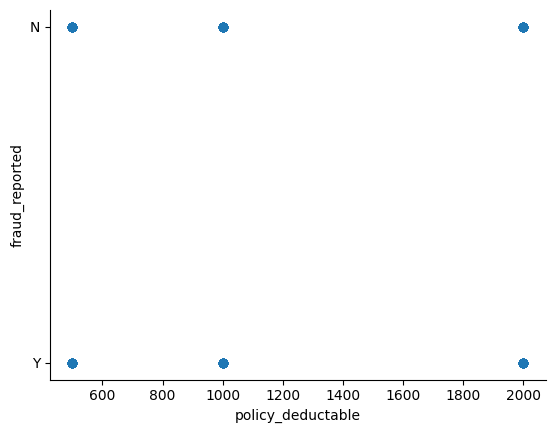

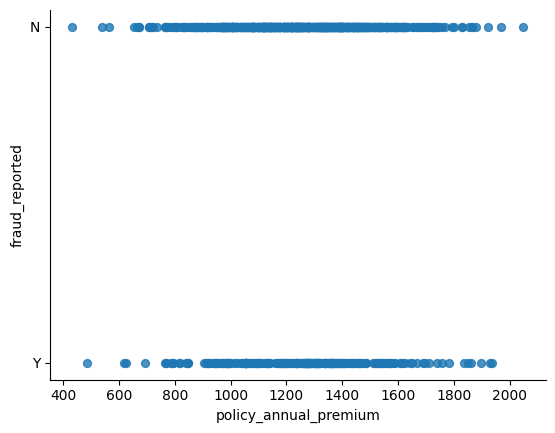

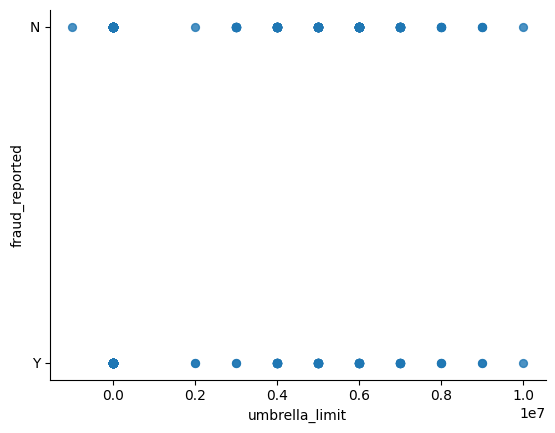

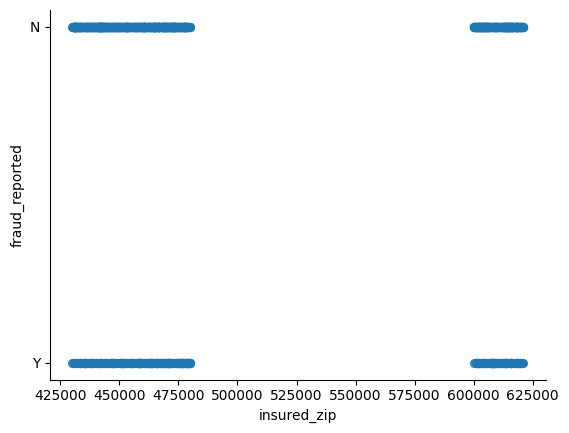

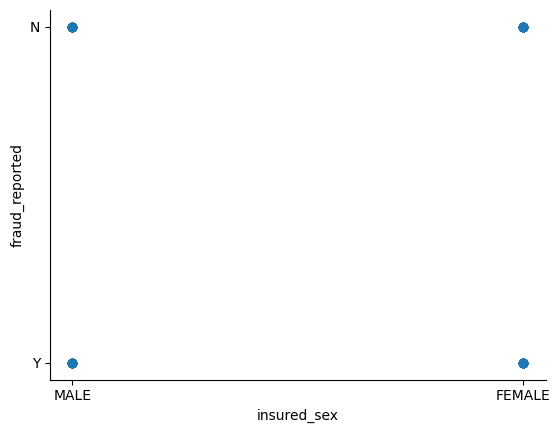

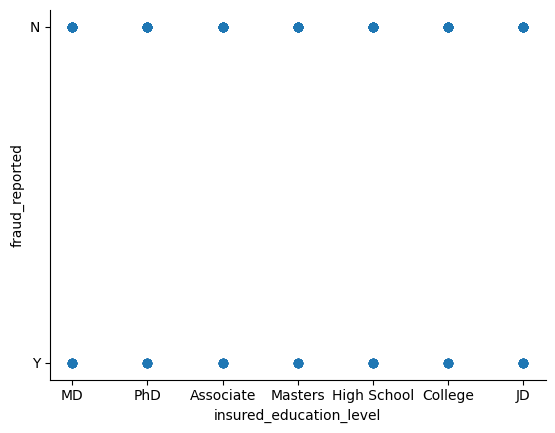

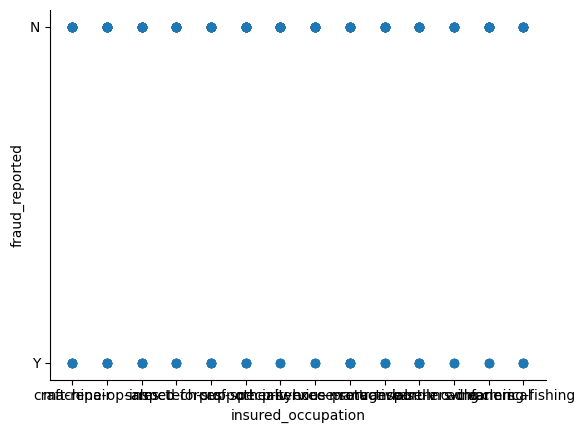

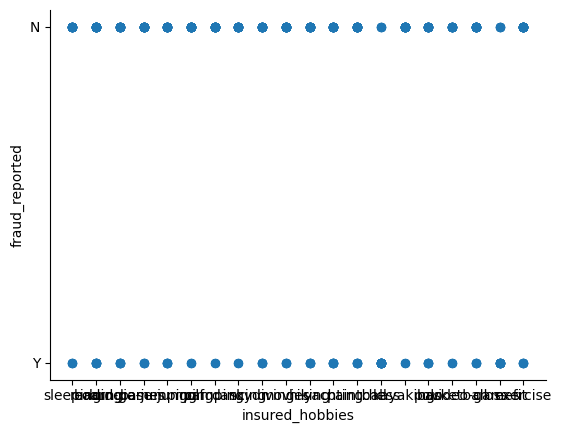

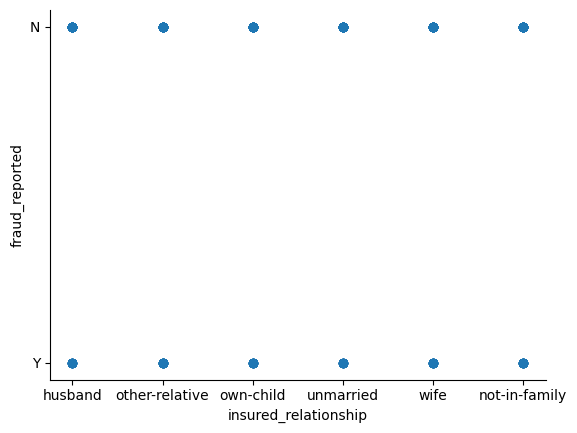

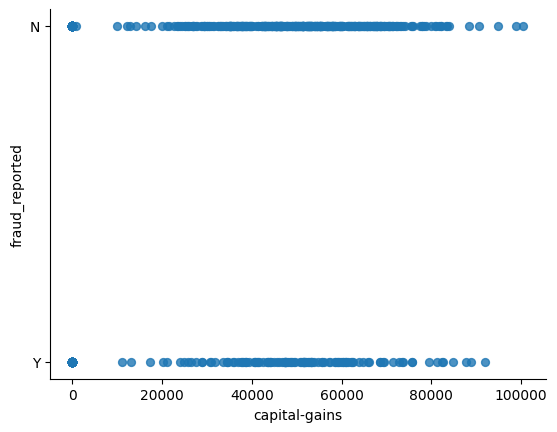

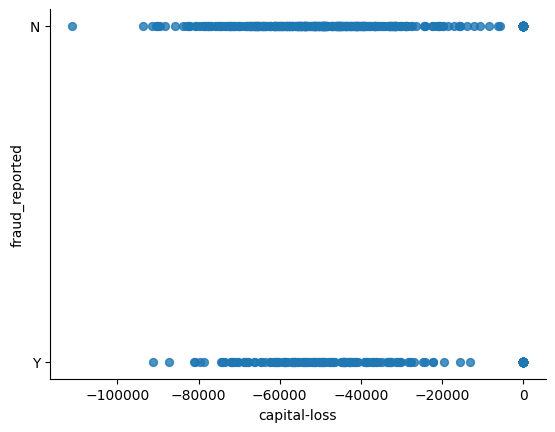

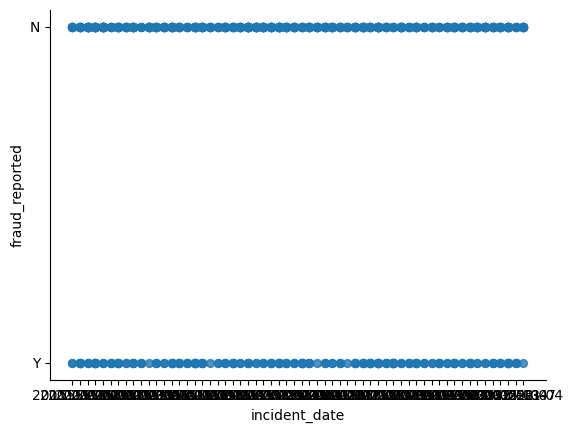

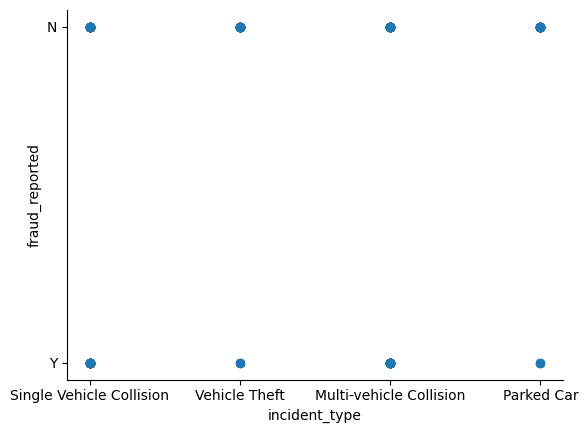

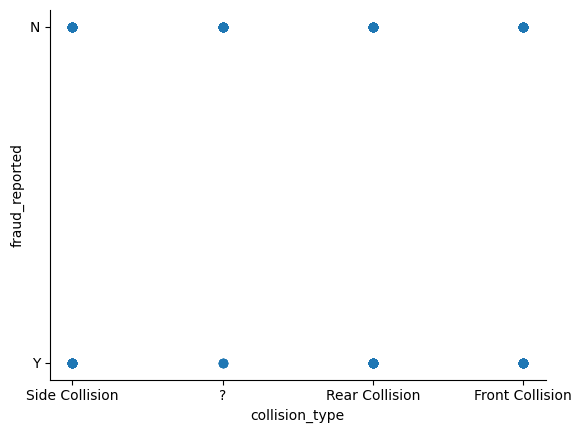

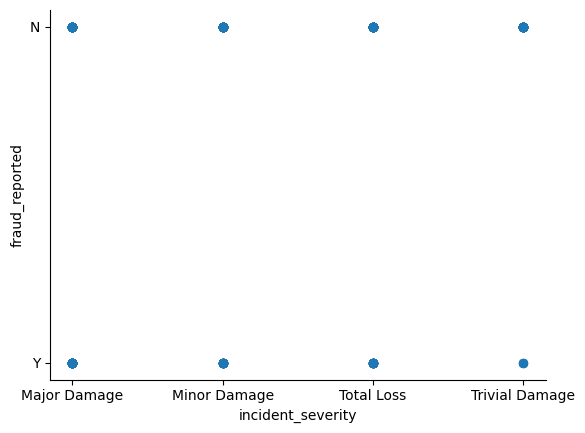

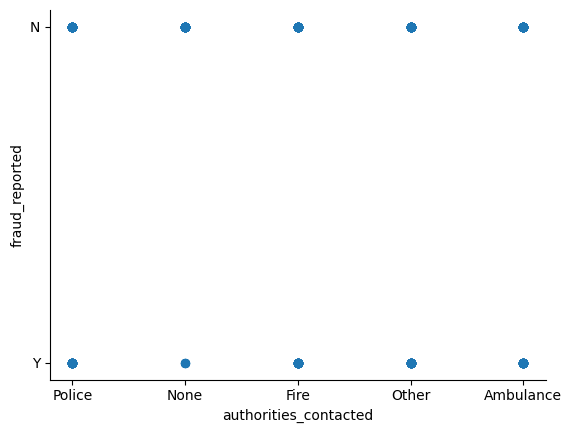

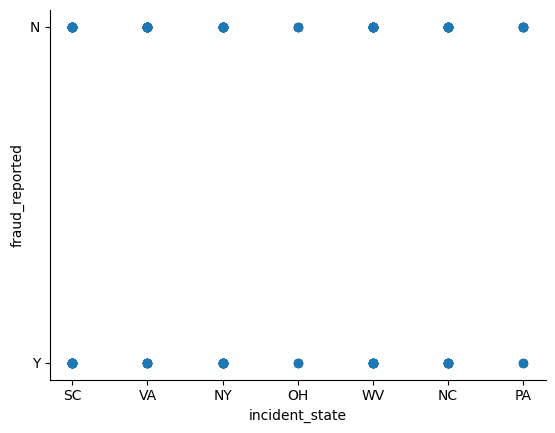

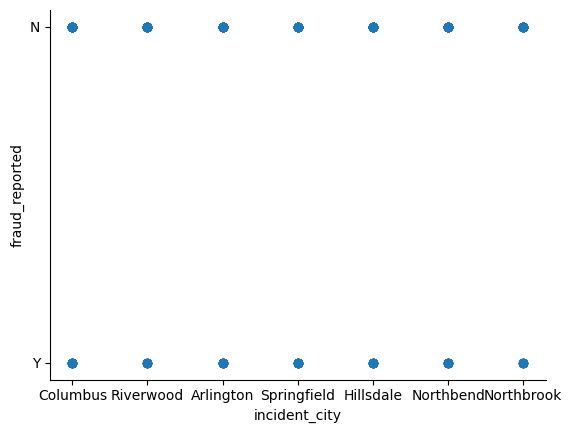

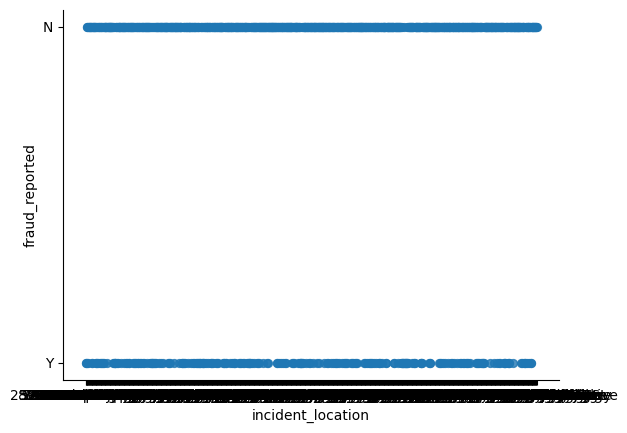

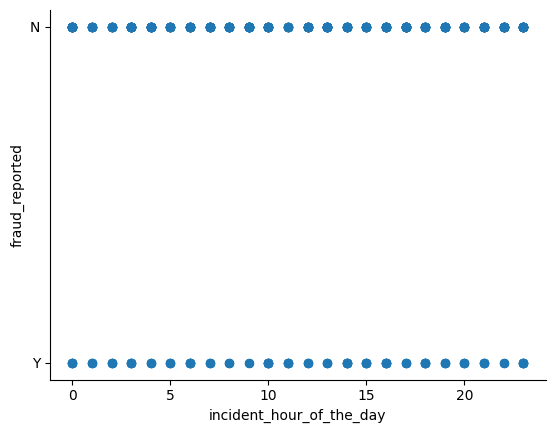

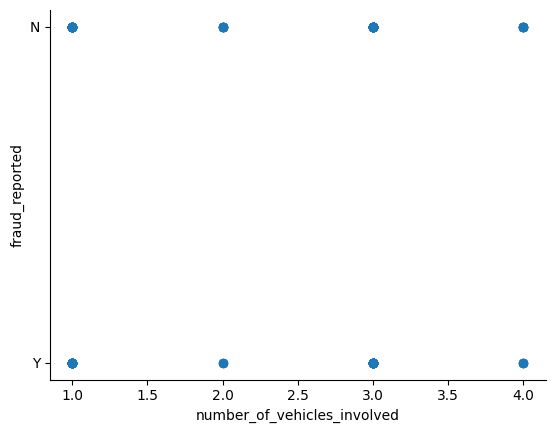

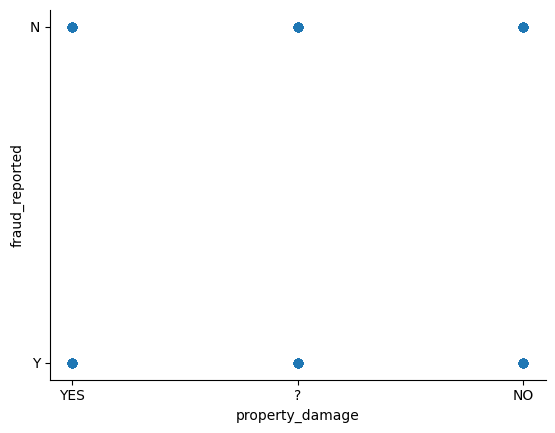

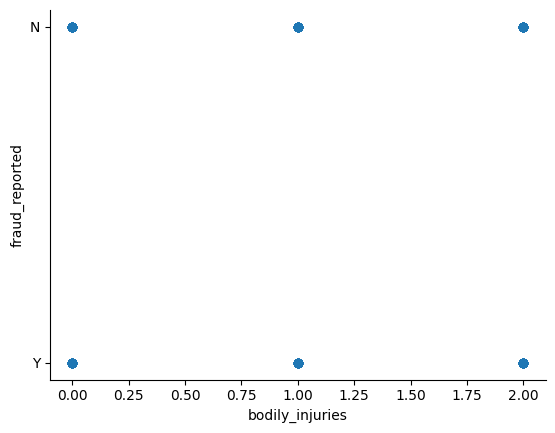

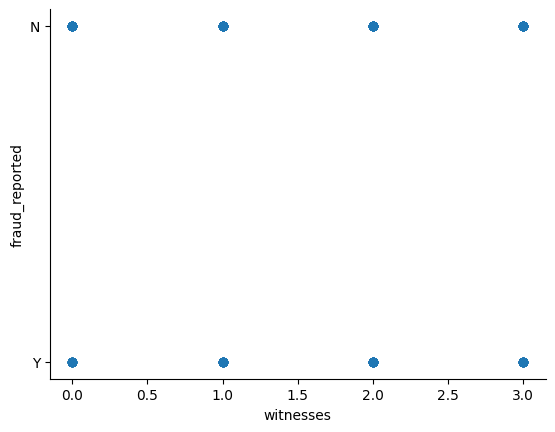

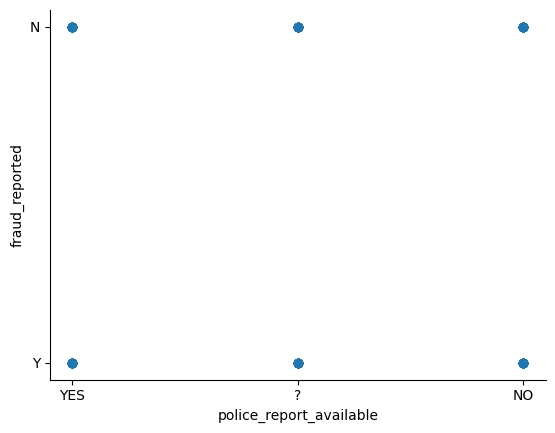

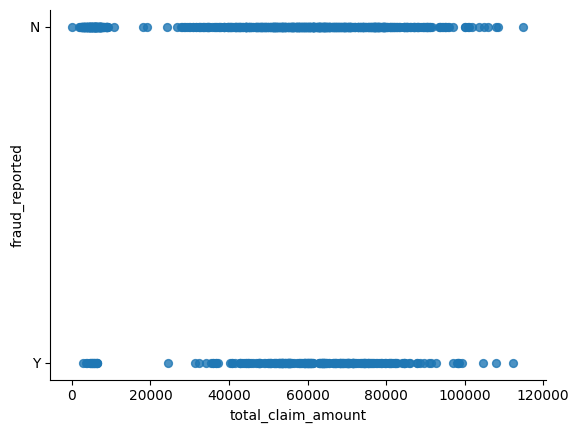

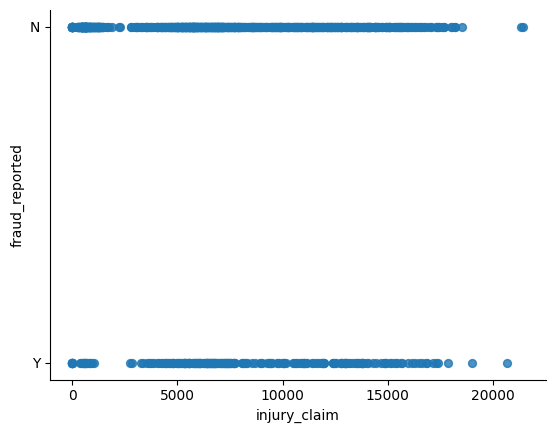

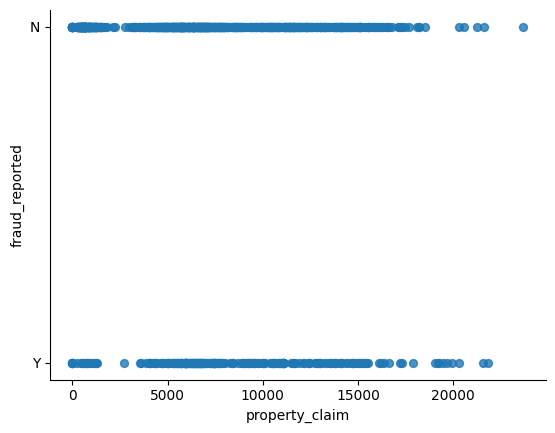

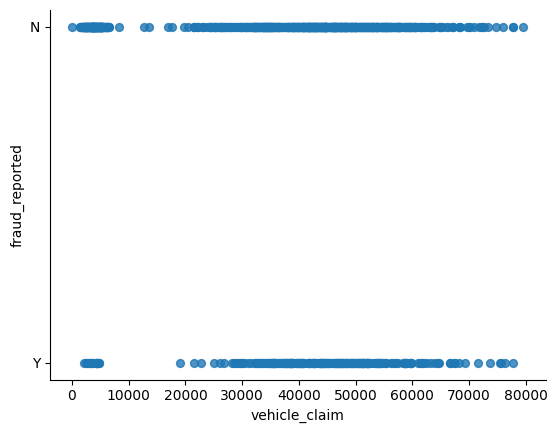

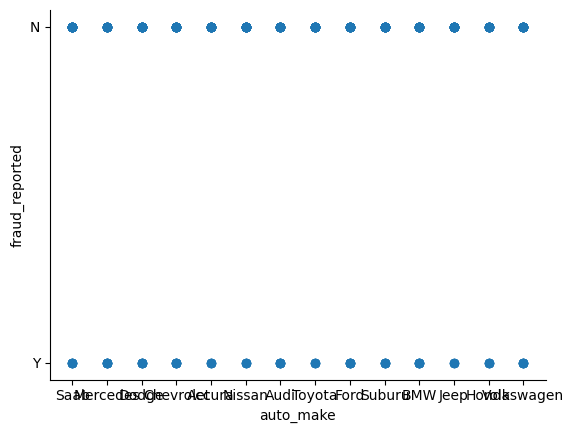

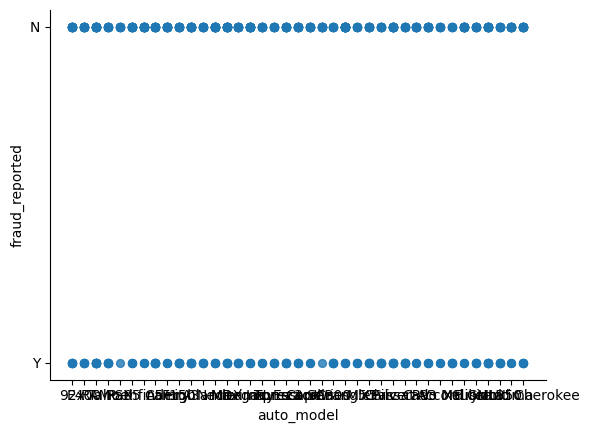

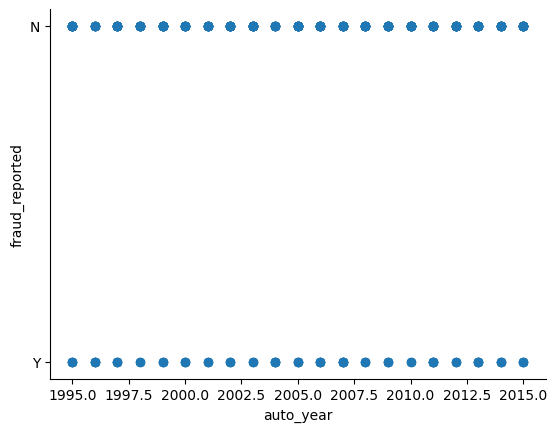

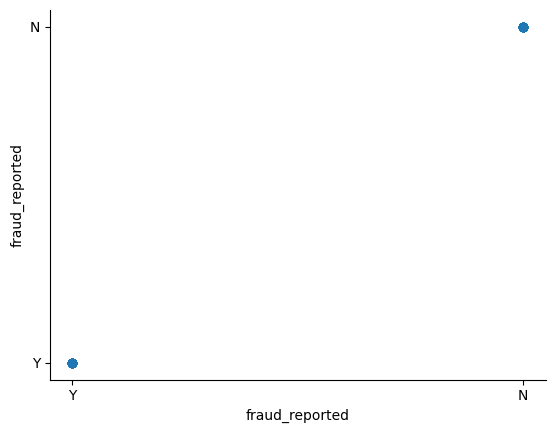

In [10]:
from matplotlib import pyplot as plt

for column in data.columns:
  data.plot(kind='scatter', x=column, y='fraud_reported', s=32, alpha=.8)
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
label_encoder = LabelEncoder()


data["fraud_reported"] = label_encoder.fit_transform(data["fraud_reported"])

In [12]:
data.corr(method="spearman")

<ipython-input-12-f1be2e5a8198>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method="spearman")


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.912725,0.058348,0.016145,0.020084,0.004919,0.012951,-0.005428,0.013624,0.075522,0.015879,-0.016556,0.056636,0.052744,0.063605,0.025255,0.048206,0.004376,0.015133
age,0.912725,1.000000,0.060699,0.022527,0.030759,0.001981,0.008522,-0.020973,0.001411,0.095261,0.020714,-0.019354,0.047442,0.065135,0.074304,0.055536,0.051485,0.005606,0.003637
policy_number,0.058348,0.060699,1.000000,-0.015694,0.018145,0.005017,-0.000638,0.007200,-0.007650,-0.000663,0.016558,-0.005012,-0.013483,-0.008040,-0.011381,-0.002653,-0.013436,-0.000718,-0.030222
policy_deductable,0.016145,0.022527,-0.015694,1.000000,0.003461,0.001609,-0.004514,0.028327,-0.024865,0.066797,0.044657,-0.019673,0.075558,0.019857,0.029569,0.056558,0.003857,0.024148,0.007041
policy_annual_premium,0.020084,0.030759,0.018145,0.003461,1.000000,-0.001056,0.043171,-0.015294,0.032233,-0.002511,-0.044377,0.020619,0.012142,-0.001634,-0.019166,-0.004412,0.007299,-0.029840,-0.015358
umbrella_limit,0.004919,0.001981,0.005017,0.001609,-0.001056,1.000000,0.004205,-0.042554,-0.020611,-0.021295,-0.025267,0.041596,-0.008295,-0.041176,-0.047237,-0.017578,-0.038006,0.012026,0.060056
insured_zip,0.012951,0.008522,-0.000638,-0.004514,0.043171,0.004205,1.000000,0.015023,0.041810,0.009845,0.013981,0.040177,0.022208,-0.002895,-0.008189,-0.014668,-0.016474,-0.027543,0.061857
capital-gains,-0.005428,-0.020973,0.007200,0.028327,-0.015294,-0.042554,0.015023,1.000000,-0.041112,-0.016139,0.057753,0.055789,-0.016751,0.012380,0.022957,0.005267,0.010284,0.027424,-0.020754
capital-loss,0.013624,0.001411,-0.007650,-0.024865,0.032233,-0.020611,0.041810,-0.041112,1.000000,-0.029257,-0.017218,-0.024015,-0.039988,-0.042204,-0.045653,-0.023383,-0.040457,-0.054552,-0.015365
incident_hour_of_the_day,0.075522,0.095261,-0.000663,0.066797,-0.002511,-0.021295,0.009845,-0.016139,-0.029257,1.000000,0.125927,-0.034651,0.006390,0.178218,0.165724,0.169450,0.174234,0.020370,0.004153


<ipython-input-13-5724ddc1e1a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = data.corr(method="spearman")


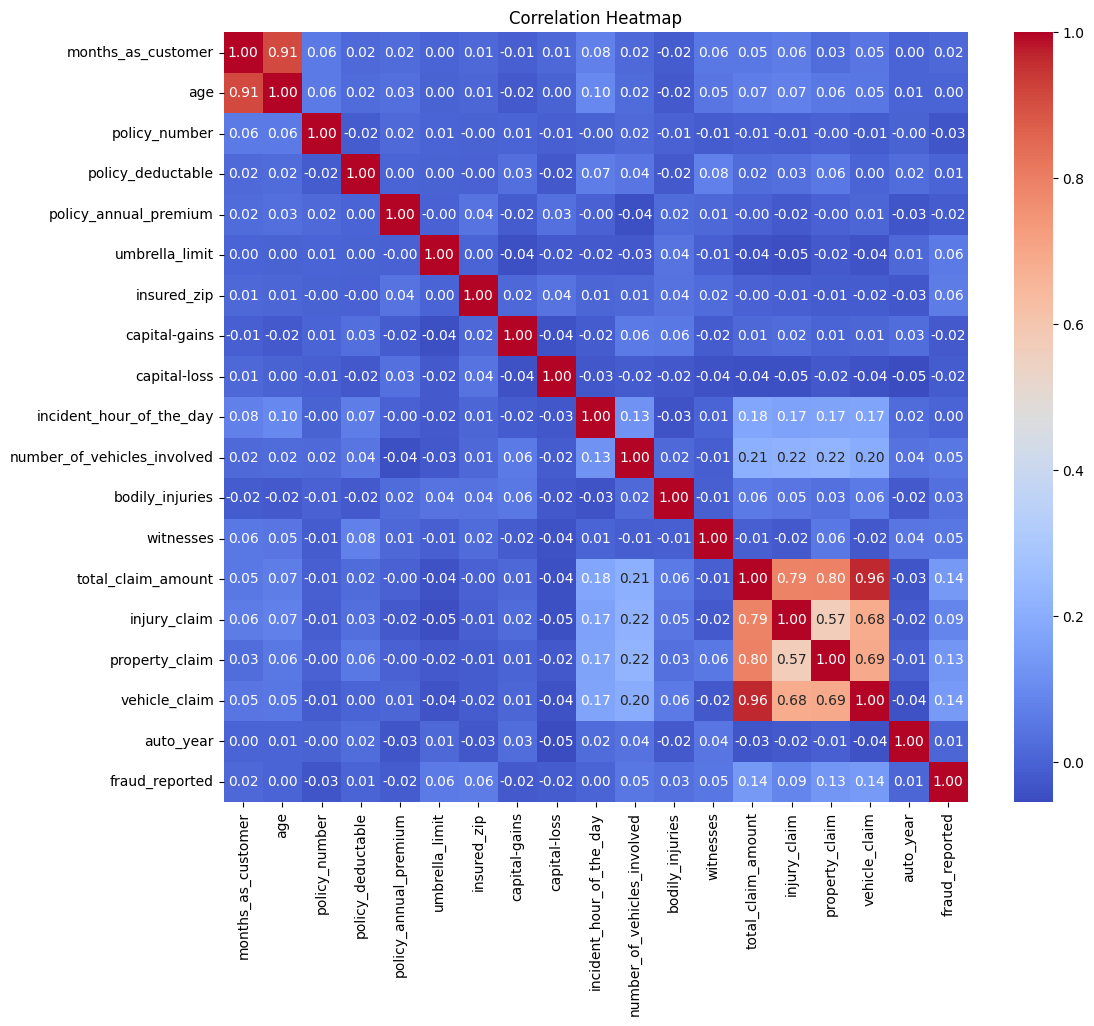

In [13]:
corr_data = data.corr(method="spearman")



plt.figure(figsize=(12, 10))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

# Show plot
plt.show()


**TO FIND UNIQUE VALUES OF OBJECT VALUES**

In [14]:
classes_with_too_many_instances = []


for i in data.columns:
  if data[i].dtype == 'object':
    if data[i].nunique() > 10:
      classes_with_too_many_instances.append(i)

    print(i,":", data[i].nunique())


print(classes_with_too_many_instances)

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
['policy_bind_date', 'insured_occupation', 'insured_hobbies', 'incident_date', 'incident_location', 'auto_make', 'auto_model']


In [15]:


for column in data.columns:
    # Check if '?' exists in the column
    if data[column].dtype == "object":

      if data[column].astype(str).str.contains('\?').any():
        print(f"'?' exists in column: {column}")

'?' exists in column: collision_type
'?' exists in column: property_damage
'?' exists in column: police_report_available


In [16]:
data.replace('?', np.nan, inplace=True)

Replace Missing Object (String) values with the most occurence

In [17]:
# prompt: replace nan with the mode of the each columns in th data dataframe

for column in data.columns:
  if data[column].dtype == "object":
    data[column].fillna(data[column].mode()[0], inplace=True)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [19]:
# Compute correlation coefficients between numeric features and target variable
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_with_fraud = data[numeric_features].corrwith(data['fraud_reported'])

# Sort the correlations in descending order
sorted_correlation = correlation_with_fraud.abs().sort_values(ascending=False)

print("Correlation coefficients with 'fraud_reported':")
print(sorted_correlation)


Correlation coefficients with 'fraud_reported':
fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
policy_number                  0.029443
months_as_customer             0.020544
insured_zip                    0.019368
capital-gains                  0.019173
capital-loss                   0.014863
policy_deductable              0.014817
policy_annual_premium          0.014480
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
dtype: float64


### DROP NOT NEEDED COLUMNS FOR MODEL TRAINING


In [20]:
data = data.drop([
  'policy_bind_date',
  "policy_number",
  "policy_csl",
  'insured_occupation',
  'insured_hobbies',
  'incident_date',
  'incident_location',
  'auto_make',
  "policy_number",
  "insured_zip",
  "capital-gains",
  "capital-loss" ,
  "policy_annual_premium",
  "auto_year",
  "incident_hour_of_the_day",
  'auto_model',
  "incident_date",
  "incident_state",
  "incident_city" ,
  "incident_location",
  "incident_hour_of_the_day" ],
    axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   months_as_customer           1000 non-null   int64 
 1   age                          1000 non-null   int64 
 2   policy_state                 1000 non-null   object
 3   policy_deductable            1000 non-null   int64 
 4   umbrella_limit               1000 non-null   int64 
 5   insured_sex                  1000 non-null   object
 6   insured_education_level      1000 non-null   object
 7   insured_relationship         1000 non-null   object
 8   incident_type                1000 non-null   object
 9   collision_type               1000 non-null   object
 10  incident_severity            1000 non-null   object
 11  authorities_contacted        1000 non-null   object
 12  number_of_vehicles_involved  1000 non-null   int64 
 13  property_damage              1000 

In [22]:
data = data.drop([
  'insured_sex', 'insured_relationship', 'insured_education_level'],
    axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   months_as_customer           1000 non-null   int64 
 1   age                          1000 non-null   int64 
 2   policy_state                 1000 non-null   object
 3   policy_deductable            1000 non-null   int64 
 4   umbrella_limit               1000 non-null   int64 
 5   incident_type                1000 non-null   object
 6   collision_type               1000 non-null   object
 7   incident_severity            1000 non-null   object
 8   authorities_contacted        1000 non-null   object
 9   number_of_vehicles_involved  1000 non-null   int64 
 10  property_damage              1000 non-null   object
 11  bodily_injuries              1000 non-null   int64 
 12  witnesses                    1000 non-null   int64 
 13  police_report_available      1000 

In [24]:
data["policy_state"].describe()

count     1000
unique       3
top         OH
freq       352
Name: policy_state, dtype: object

In [25]:
policy_state_one_hot_encoded = pd.get_dummies(data['policy_state'], prefix='policy_state_encoded')

data = pd.concat([data, policy_state_one_hot_encoded], axis=1)

data.drop('policy_state', axis=1, inplace=True)

data

,months_as_customer,age,policy_deductable,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_encoded_IL,policy_state_encoded_IN,policy_state_encoded_OH
0,328,48,1000,0,Single Vehicle Collision,Side Collision,Major Damage,Police,1,YES,...,2,YES,71610,6510,13020,52080,1,0,0,1
1,228,42,2000,5000000,Vehicle Theft,Rear Collision,Minor Damage,Police,1,NO,...,0,NO,5070,780,780,3510,1,0,1,0
2,134,29,2000,5000000,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,3,NO,...,3,NO,34650,7700,3850,23100,0,0,0,1
3,256,41,2000,6000000,Single Vehicle Collision,Front Collision,Major Damage,Police,1,NO,...,2,NO,63400,6340,6340,50720,1,1,0,0
4,228,44,1000,6000000,Vehicle Theft,Rear Collision,Minor Damage,None,1,NO,...,1,NO,6500,1300,650,4550,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,1,YES,...,1,NO,87200,17440,8720,61040,0,0,0,1
996,285,41,1000,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,1,YES,...,3,NO,108480,18080,18080,72320,0,1,0,0
997,130,34,500,3000000,Multi-vehicle Collision,Side Collision,Minor Damage,Police,3,NO,...,3,YES,67500,7500,7500,52500,0,0,0,1
998,458,62,2000,5000000,Single Vehicle Collision,Rear Collision,Major Damage,Other,1,NO,...,1,YES,46980,5220,5220,36540,0,1,0,0


In [26]:
data["incident_type"].describe()

count                        1000
unique                          4
top       Multi-vehicle Collision
freq                          419
Name: incident_type, dtype: object

In [27]:
label_encoder = LabelEncoder()

data['incident_type'] = label_encoder.fit_transform(data['incident_type'])

In [28]:
label_encoder = LabelEncoder()

data['authorities_contacted'] = label_encoder.fit_transform(data['authorities_contacted'])

In [29]:
label_encoder = LabelEncoder()

data['collision_type'] = label_encoder.fit_transform(data['collision_type'])

In [30]:

label_encoder = LabelEncoder()

data['incident_severity'] = label_encoder.fit_transform(data['incident_severity'])

In [31]:

label_encoder = LabelEncoder()

data['property_damage'] = label_encoder.fit_transform(data['property_damage'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   months_as_customer           1000 non-null   int64 
 1   age                          1000 non-null   int64 
 2   policy_deductable            1000 non-null   int64 
 3   umbrella_limit               1000 non-null   int64 
 4   incident_type                1000 non-null   int64 
 5   collision_type               1000 non-null   int64 
 6   incident_severity            1000 non-null   int64 
 7   authorities_contacted        1000 non-null   int64 
 8   number_of_vehicles_involved  1000 non-null   int64 
 9   property_damage              1000 non-null   int64 
 10  bodily_injuries              1000 non-null   int64 
 11  witnesses                    1000 non-null   int64 
 12  police_report_available      1000 non-null   object
 13  total_claim_amount           1000 

In [33]:
label_encoder = LabelEncoder()

data['police_report_available'] = label_encoder.fit_transform(data['police_report_available'])

### SEPERARING TO X AND Y

In [34]:
data

,months_as_customer,age,policy_deductable,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_encoded_IL,policy_state_encoded_IN,policy_state_encoded_OH
0,328,48,1000,0,2,2,0,4,1,1,...,2,1,71610,6510,13020,52080,1,0,0,1
1,228,42,2000,5000000,3,1,1,4,1,0,...,0,0,5070,780,780,3510,1,0,1,0
2,134,29,2000,5000000,0,1,1,4,3,0,...,3,0,34650,7700,3850,23100,0,0,0,1
3,256,41,2000,6000000,2,0,0,4,1,0,...,2,0,63400,6340,6340,50720,1,1,0,0
4,228,44,1000,6000000,3,1,1,2,1,0,...,1,0,6500,1300,650,4550,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,2,0,1,1,1,1,...,1,0,87200,17440,8720,61040,0,0,0,1
996,285,41,1000,0,2,1,0,1,1,1,...,3,0,108480,18080,18080,72320,0,1,0,0
997,130,34,500,3000000,0,2,1,4,3,0,...,3,1,67500,7500,7500,52500,0,0,0,1
998,458,62,2000,5000000,2,1,0,3,1,0,...,1,1,46980,5220,5220,36540,0,1,0,0


In [61]:
X = data.drop(["fraud_reported", "property_claim", "injury_claim", "vehicle_claim"], axis=1)

Y = data["fraud_reported"]

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [149]:
scaler = StandardScaler()

In [150]:
x_train_scaled = scaler.fit_transform(x_train)

x_trained = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [151]:
x_test_scaled = scaler.fit_transform(x_test)

x_tested = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### Training of Model

#### SVC MODEL

In [152]:
svc_model = SVC()


svc_model.fit(x_trained, y_train)

y_pred = svc_model.predict(x_tested)


svc_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of SVC for testing data is :","{:.2f}%".format(100*svc_accuracy))

Accuracy of SVC for testing data is : 80.67%


In [153]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier


In [154]:
log_model = LogisticRegression()

log_model.fit(x_trained, y_train)

y_pred = log_model.predict(x_tested)


log_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of LogisticRegression for testing data is :","{:.2f}%".format(100*log_accuracy))


Accuracy of LogisticRegression for testing data is : 80.67%


In [155]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(x_trained, y_train)

y_pred = random_forest_model.predict(x_tested)

random_forest_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of RandomForestClassifier for testing data is :","{:.2f}%".format(100*random_forest_accuracy))



Accuracy of RandomForestClassifier for testing data is : 84.00%


In [156]:
gradient_boost_model = GradientBoostingClassifier()

gradient_boost_model.fit(x_trained, y_train)

y_pred = gradient_boost_model.predict(x_tested)

gradient_boost_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of GradientBoostingClassifier for testing data is :","{:.2f}%".format(100*gradient_boost_accuracy))

Accuracy of GradientBoostingClassifier for testing data is : 82.67%


In [157]:
knn_model = KNeighborsClassifier()

knn_model.fit(x_trained, y_train)

y_pred = knn_model.predict(x_tested)

knn_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of KNeighborsClassifier for testing data is :","{:.2f}%".format(100*knn_accuracy))

Accuracy of KNeighborsClassifier for testing data is : 78.67%


In [158]:
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(x_trained, y_train)

y_pred = decision_tree_model.predict(x_tested)

decision_tree_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of DecisionTreeClassifier for testing data is :","{:.2f}%".format(100*decision_tree_accuracy))

Accuracy of DecisionTreeClassifier for testing data is : 76.00%


In [159]:
gaussian_model = GaussianNB()

gaussian_model.fit(x_trained, y_train)

y_pred = gaussian_model.predict(x_tested)

gaussian_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of GaussianNB for testing data is :","{:.2f}%".format(100*gaussian_accuracy))

Accuracy of GaussianNB for testing data is : 83.33%


In [160]:
mlp_model = MLPClassifier()

mlp_model.fit(x_trained, y_train)

y_pred = mlp_model.predict(x_tested)

mlp_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of MLPClassifier for testing data is :","{:.2f}%".format(100*mlp_accuracy))

Accuracy of MLPClassifier for testing data is : 81.33%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [161]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_trained, y_train)

y_pred = xgb_model.predict(x_tested)

xgb_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of XGBClassifier for testing data is :","{:.2f}%".format(100*xgb_accuracy))


Accuracy of XGBClassifier for testing data is : 82.00%


In [162]:


knn_model = KNeighborsClassifier()

knn_model.fit(x_trained, y_train)

y_pred = knn_model.predict(x_tested)

knn_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of knnClassifier for testing data is :","{:.2f}%".format(100*knn_accuracy))

Accuracy of knnClassifier for testing data is : 78.67%


In [163]:
# Using Neural Network

import tensorflow as tf
from tensorflow import keras




model = keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(x_trained.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(x_trained, y_train, epochs=12, batch_size=32, validation_split=0.1)



Epoch 1/12
24/24 [==============================] - 2s 11ms/step - loss: 0.5734 - accuracy: 0.7425 - val_loss: 0.5843 - val_accuracy: 0.7176
Epoch 2/12
24/24 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7503 - val_loss: 0.5528 - val_accuracy: 0.7176
Epoch 3/12
24/24 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7699 - val_loss: 0.5094 - val_accuracy: 0.7529
Epoch 4/12
24/24 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.7843 - val_loss: 0.5036 - val_accuracy: 0.7647
Epoch 5/12
24/24 [==============================] - 0s 4ms/step - loss: 0.4429 - accuracy: 0.8261 - val_loss: 0.5017 - val_accuracy: 0.7529
Epoch 6/12
24/24 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.8301 - val_loss: 0.4985 - val_accuracy: 0.7647
Epoch 7/12
24/24 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8405 - val_loss: 0.4644 - val_accuracy: 0.7882
Epoch 8/12
24/24 [=

In [164]:
# Neural Network Accuracy
loss, neaural_network_accuracy = model.evaluate(x_tested, y_test)


print("Accuracy of Neaural Network for testing data is :","{:.2f}%".format(100*neaural_network_accuracy))


5/5 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7933
Accuracy of Neaural Network for testing data is : 79.33%


In [165]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression','SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gaussian', 'XGBoost', "Neural Network", "MLP"],
    'Score' : [log_accuracy,svc_accuracy,knn_accuracy, decision_tree_accuracy, random_forest_accuracy, gaussian_accuracy,xgb_accuracy, neaural_network_accuracy, mlp_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.840000
5,Gaussian,0.833333
6,XGBoost,0.820000
8,MLP,0.813333
0,LogisticRegression,0.806667
1,SVM,0.806667
7,Neural Network,0.793333
2,KNN,0.786667
3,Decision Tree,0.760000


<ipython-input-166-4fbb6c7b99ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)


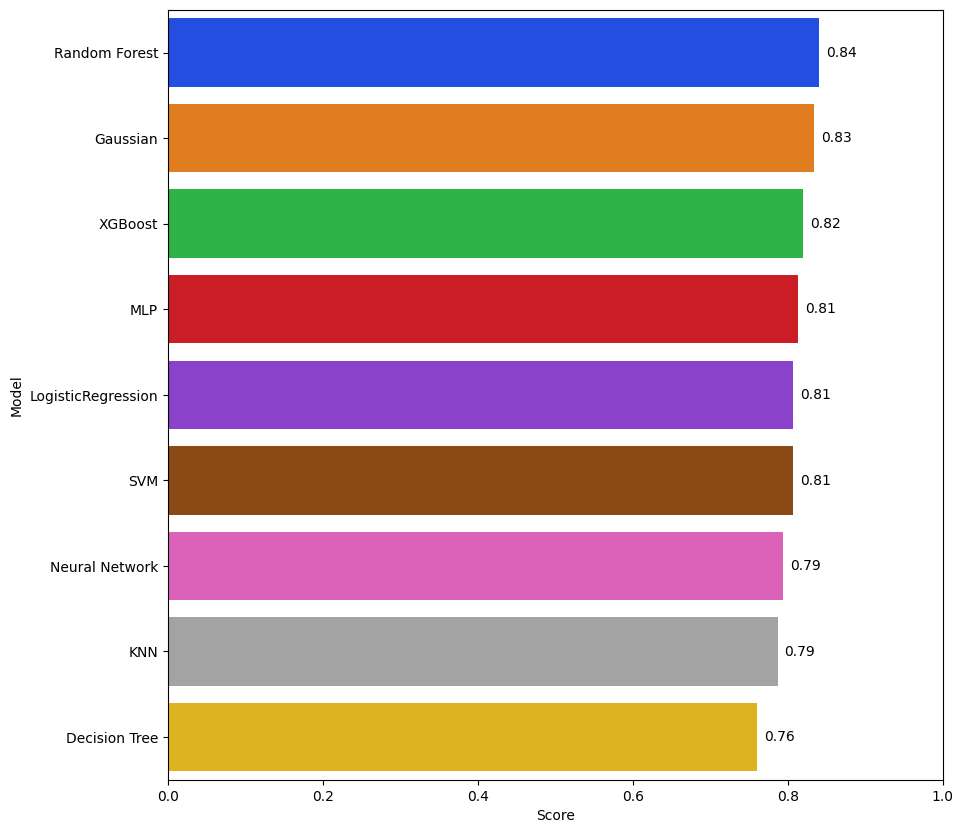

In [166]:
fig,ax = plt.subplots(figsize=(10,10))
barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)
ax.set(xlim=(0,1))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

## Saving the Mdoel

### HYPER PARAMETER TUNING

LOGISTIC REGRESSION


In [172]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers for Logistic Regression
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']  # Different kernel functions for SVM
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [4, 8, 16]  # Maximum depth of individual trees
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],  # Number of neighbors to consider
}

param_grid_xgboost = {
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate for boosting
    'n_estimators': [100, 200, 500]  # Number of boosting stages
}

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh']  # Activation function for neurons
}

# Create and run GridSearchCV for each model
models = []
for model_name, model,  param_grid in [
    ('Logistic Regression', LogisticRegression(), param_grid_logistic),

    ('Gaussian Naive Bayes', GaussianNB(), None),  # No hyperparameters to tune for Naive Bayes

    ('SVC', SVC() ,  param_grid_svc),

    ('Random Forest', RandomForestClassifier(), param_grid_random_forest),

    ('KNN',KNeighborsClassifier(), param_grid_knn),

    ('XGBoost', XGBClassifier() , param_grid_xgboost),

    ('MLP', MLPClassifier(), param_grid_mlp)
]:
    if model_name != 'Gaussian Naive Bayes':  # Naive Bayes already instantiated
        model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
        model.fit(x_trained, y_train)
    else:
        model = model.fit(x_trained, y_train)  # Naive Bayes fit directly
    models.append((model_name, model))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [178]:
best_accuracy = 0
best_model = None
for model_name, model in models:
  if not isinstance(model, GaussianNB):

    y_pred =  model.best_estimator_.predict(x_tested)

    model_accuracy = accuracy_score(y_test, y_pred)

    if model_accuracy > best_accuracy:
            best_accuracy = model_accuracy
            best_model = model.best_estimator_


    print(f"\n Model acccuracy for {model_name}:", model_accuracy)






 Model acccuracy for Logistic Regression: 0.82

 Model acccuracy for SVC: 0.8666666666666667

 Model acccuracy for Random Forest: 0.8333333333333334

 Model acccuracy for KNN: 0.7866666666666666

 Model acccuracy for XGBoost: 0.8333333333333334

 Model acccuracy for MLP: 0.7933333333333333


In [179]:
joblib.dump(best_model, 'insurace_fraud_model_SVC_Ignaz.pkl')

['insurace_fraud_model_SVC_Ignaz.pkl']


 Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7679012345679013

 Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.7814814814814814

 Best Hyperparameters: {'max_depth': 8, 'n_estimators': 200}
Best Cross-Validation Score: 0.7691358024691357

 Best Hyperparameters: {'n_neighbors': 10}
Best Cross-Validation Score: 0.7333333333333334

 Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 100}
Best Cross-Validation Score: 0.7679012345679013

 Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,)}
Best Cross-Validation Score: 0.7654320987654322
